<a href="https://colab.research.google.com/github/Qi-Xian/CodeIgniter-UserGuide/blob/master/HW_4_Feature_match.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Synopsis
In this project, you will learn to use opencv to perform feature detectors in an image and find the best matching features in other images.  

<img src="https://vision.cornell.edu/se3/wp-content/uploads/2017/05/homography-705x1141.png" width="300"> 

Next, you will apply your matching results to align images to generate __infinite zoom__ visual effect. Some examples: 

<img src="https://videolancer.net//wp-content/uploads/2018/03/simple-1.gif" width="300"> 
<img src="https://videolancer.net//wp-content/uploads/2018/03/optics-2.gif" width="300">  


### Scores 
1. (5%)Take a sequence of moving-forward images in NTHU campus.
2. (5%)Show feature extraction and matching results between two images 
3. (10%)Perform image alignment and generate infinite zooming effect 
4. (20%)implement different feature extrators, e.g. SIFT, SURF, and compare the results 
5. (10%)exploit creativity to add some image processing to enhance effect. You can use photoshop to do some effects, such as bluring or coloring.   
6. (30%) Assistant score
7. (20%)Mutual evaluation


### Feature Extraction 
Your features should be reasonably invariant to translation, rotation, illumination, and scale, and you'll evaluate their performance on a suite of benchmark images.  We'll rank the performance of features that students in the class come up with, and compare them with the current state-of-the-art.


## Environment Setup for OpenCV 
To help you visualize the results and debug your program, we provide a working user interface that displays detected features and best matches in other images.  We also provide sample feature files that were generated using ORB, the current best of breed technique in the vision community, for comparison.


## Reference 
* Image registration and transformation <br>
https://colab.research.google.com/drive/1BwdSConGugBlGzPLLkXHTz2ahkdzEhQ9 
http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_geometric.html


* Image alignment <br>
https://www.learnopencv.com/image-alignment-feature-based-using-opencv-c-python/
https://github.com/michal2229/image-align-and-average
https://www.pyimagesearch.com/2016/01/11/opencv-panorama-stitching/ # 新段落

## Previous work
https://www.youtube.com/watch?v=DcaAHDKjabo

https://www.youtube.com/watch?v=5zQ_RnVvjxI

https://www.youtube.com/watch?v=oNsYRzeGDh8

https://www.youtube.com/watch?time_continue=2&v=nz92suXBC_M

https://www.youtube.com/watch?v=dqGhWbuSOpc




In [1]:
# Import package for feature matching 
# Connect to Google Drive from youtself
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import time

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
dirs = list()
dirs=([x[0] for x in os.walk("/content/drive/My Drive/cefcv/cv_photos")])
# Ensure the image is exists
j=0
photos = list()
enh = list()
for i in dirs:
  if j>0:
    dim = 2
    photo = list()
    name = [os.listdir(i)[0].split()[0], os.listdir(i)[1].split('.')[1]]
    print (name)
    en=list()
    for p in [0,1,2,3,4]:
      l='{0}'.format(str(p+1).zfill(dim))
      n = i+'/'+name[0]+' '+l+'.'+name[1]
      photo.append(n)
      ne = i+'/'+name[0]+'_enhanced '+l+'.'+name[1]
      en.append(ne)
    enh.append(en)  
    photos.append(photo)
  j+=1
    
  #!ls i
  #print([x[0] for x in os.walk(i)])

['IMG_5455', 'jpg']
['IMG_5435', 'jpg']
['IMG_5442', 'jpg']
['IMG_5437', 'jpg']


In [0]:
kp1_brisk=list()
kp2_brisk=list()
des1_brisk=list()
des2_brisk=list()
keypoints=list()

In [0]:
print (enh)

[['/content/drive/My Drive/cefcv/cv_photos/IMG_5455 (2019-4-18 15-43-14)/IMG_5455_enhanced 01.jpg', '/content/drive/My Drive/cefcv/cv_photos/IMG_5455 (2019-4-18 15-43-14)/IMG_5455_enhanced 02.jpg', '/content/drive/My Drive/cefcv/cv_photos/IMG_5455 (2019-4-18 15-43-14)/IMG_5455_enhanced 03.jpg', '/content/drive/My Drive/cefcv/cv_photos/IMG_5455 (2019-4-18 15-43-14)/IMG_5455_enhanced 04.jpg', '/content/drive/My Drive/cefcv/cv_photos/IMG_5455 (2019-4-18 15-43-14)/IMG_5455_enhanced 05.jpg'], ['/content/drive/My Drive/cefcv/cv_photos/IMG_5435 (2019-4-18 12-14-01)/IMG_5435_enhanced 01.jpg', '/content/drive/My Drive/cefcv/cv_photos/IMG_5435 (2019-4-18 12-14-01)/IMG_5435_enhanced 02.jpg', '/content/drive/My Drive/cefcv/cv_photos/IMG_5435 (2019-4-18 12-14-01)/IMG_5435_enhanced 03.jpg', '/content/drive/My Drive/cefcv/cv_photos/IMG_5435 (2019-4-18 12-14-01)/IMG_5435_enhanced 04.jpg', '/content/drive/My Drive/cefcv/cv_photos/IMG_5435 (2019-4-18 12-14-01)/IMG_5435_enhanced 05.jpg'], ['/content/driv

In [0]:
def briskyBrisk(ph):
  start = time.time()
  brisk = cv2.BRISK_create()
  for photos in ph:
    kp1=list()
    kp2=list()
    des1=list()
    des2=list()
    keypoint = list()
    for i in [0,1,2,3]:
      #print(photos[i], photos[i+1])
      img1 = cv2.imread(photos[i],0) 
      img2 = cv2.imread(photos[i+1],0)
      # find the keypoints and descriptors with BRISK
      kp01, des01 = brisk.detectAndCompute(img1,None)
      kp02, des02 = brisk.detectAndCompute(img2,None)
      kp1.append(kp01)
      kp2.append(kp02)
      des1.append(des01)
      des2.append(des02)
      keypoint.append(brisk.detect(img1, None))
    img1 = cv2.imread(photos[-1],0) 
    keypoint.append(brisk.detect(img1,None))
    keypoints.append(keypoint)
    kp1_brisk.append(kp1)
    kp2_brisk.append(kp2)
    des1_brisk.append(des1)
    des2_brisk.append(des2)
  end = time.time()
  print(end - start)

In [5]:
briskyBrisk(photos)
briskyBrisk(enh)

36.51581168174744
49.73272490501404


In [0]:
kp1_sift=list()
kp2_sift=list()
des1_sift=list()
des2_sift=list()
keypoints_sift=list()

In [0]:
def siftySIFT(ph):
  start = time.time()
  orb = cv2.ORB_create()
  for photos in ph:
    kp1=list()
    kp2=list()
    des1=list()
    des2=list()
    keypoint = list()
    for i in range(len(photos)-1):
      img1 = cv2.imread(photos[i],0) 
      img2 = cv2.imread(photos[i+1],0)
      kp01, des01 = orb.detectAndCompute(img1,None)
      kp02, des02 = orb.detectAndCompute(img2,None)
      kp1.append(kp01)
      kp2.append(kp02)
      des1.append(des01)
      des2.append(des02)
      keypoint.append(orb.detect(img1, None))
    img1 = cv2.imread(photos[-1],0) 
    keypoint.append(orb.detect(img1,None))
    keypoints_sift.append(keypoint)
    kp1_sift.append(kp1)
    kp2_sift.append(kp2)
    des1_sift.append(des1)
    des2_sift.append(des2)
  end = time.time()
  print(end - start)

In [8]:
siftySIFT(photos)
siftySIFT(enh)

3.8323962688446045
4.114201545715332


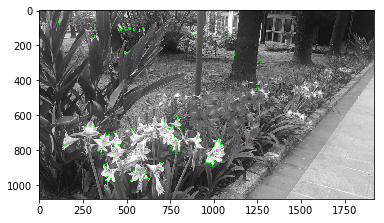

In [9]:
# Initiate SIFT detector

img1 = cv2.imread(photos[0][0],0)
ig=img1.copy()
ig = cv2.drawKeypoints(img1, keypoints_sift[0][0], ig, color=(0,255,0))
plt.imshow(ig)

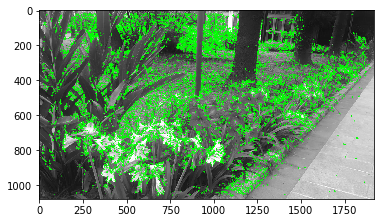

In [10]:
ig1=img1.copy()
ig1 = cv2.drawKeypoints(img1, keypoints[0][0], ig, color=(0,255,0))
plt.imshow( ig1)

# 


In [0]:
def printmatch(ph,enh):
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  for j,photos in enumerate(ph):  
    for i in range(len(photos)-1):
      matches_brisk = bf.match(des1_brisk[j][i],des2_brisk[j][i])
      matches_sift = bf.match(des1_sift[j][i],des2_sift[j][i])
      en_matches_brisk = bf.match(des1_brisk[j+4][i],des2_brisk[j+4][i])
      en_matches_sift = bf.match(des1_sift[j+4][i],des2_sift[j+4][i])
      img1 = cv2.imread(photos[i],0) 
      img2 = cv2.imread(photos[i+1],0)
      en_img1 = cv2.imread(enh[j][i],0) 
      en_img2 = cv2.imread(enh[j][i+1],0)
      matches_brisk = sorted(matches_brisk, key = lambda x:x.distance)
      matches_sift = sorted(matches_sift, key = lambda x:x.distance)
      en_matches_brisk = sorted(en_matches_brisk, key = lambda x:x.distance)
      en_matches_sift = sorted(en_matches_sift, key = lambda x:x.distance)
      ig1=img1.copy()
      ig1 = cv2.drawKeypoints(img1, keypoints[j][i], ig1, color=(0,255,0))
      ig2=en_img1.copy()
      ig2 = cv2.drawKeypoints(en_img1, keypoints[j+4][i], ig2, color=(0,255,0))
      ig3=img1.copy()
      ig3 = cv2.drawKeypoints(img1, keypoints_sift[j][i], ig3, color=(0,255,0))
      ig4=en_img2.copy()
      ig4 = cv2.drawKeypoints(en_img2, keypoints_sift[j+4][i], ig4, color=(0,255,0))
      img1 = img1[...,::-1]
      img2 = img2[...,::-1]
      en_img1 = img1[...,::-1]
      en_img2 = img2[...,::-1]
      cv2.imwrite(photos[i].split('.')[0]+'_key_sift.jpg',ig3)
      cv2.imwrite(photos[i].split('.')[0]+'_key_brisk.jpg',ig1)
      cv2.imwrite(photos[i].split('.')[0]+'_enhanced_key_sift.jpg',ig4)
      cv2.imwrite(photos[i].split('.')[0]+'_enhanced_key_brisk.jpg',ig2)
      print(photos[i],photos[i+1])
      print (' **** BRISK **** ')
      en_img3 = cv2.drawMatches(en_img1,kp1_brisk[j+4][i],en_img2,kp2_brisk[j+4][i],en_matches_brisk[:10],None, flags=2)    
      img3 = cv2.drawMatches(img1,kp1_brisk[j][i],img2,kp2_brisk[j][i],matches_brisk[:10],None, flags=2)
      plt.imshow(img3),plt.show()
      print (' **** SIFT **** ')
      en_img4 = cv2.drawMatches(en_img1,kp1_sift[j+4][i],en_img2,kp2_sift[j+4][i],en_matches_sift[:10],None, flags=2)
      img4 = cv2.drawMatches(img1,kp1_sift[j][i],img2,kp2_sift[j][i],matches_sift[:10],None, flags=2)
      plt.imshow(img4),plt.show()
      cv2.imwrite(photos[i].split('.')[0]+'_matches_sift.jpg',img4)
      cv2.imwrite(photos[i].split('.')[0]+'_matches_brisk.jpg',img3)
      cv2.imwrite(photos[i].split('.')[0]+'_enhanced_matches_sift.jpg',en_img4)
      cv2.imwrite(photos[i].split('.')[0]+'_enhanced_matches_brisk.jpg',en_img3)

/content/drive/My Drive/cefcv/cv_photos/IMG_5455 (2019-4-18 15-43-14)/IMG_5455 01.jpg /content/drive/My Drive/cefcv/cv_photos/IMG_5455 (2019-4-18 15-43-14)/IMG_5455 02.jpg
 **** BRISK **** 


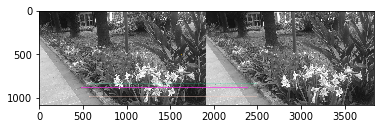

 **** SIFT **** 


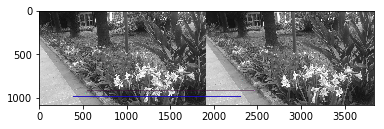

/content/drive/My Drive/cefcv/cv_photos/IMG_5455 (2019-4-18 15-43-14)/IMG_5455 02.jpg /content/drive/My Drive/cefcv/cv_photos/IMG_5455 (2019-4-18 15-43-14)/IMG_5455 03.jpg
 **** BRISK **** 


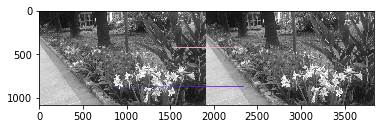

 **** SIFT **** 


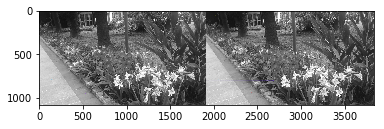

/content/drive/My Drive/cefcv/cv_photos/IMG_5455 (2019-4-18 15-43-14)/IMG_5455 03.jpg /content/drive/My Drive/cefcv/cv_photos/IMG_5455 (2019-4-18 15-43-14)/IMG_5455 04.jpg
 **** BRISK **** 


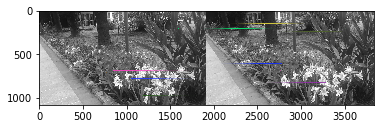

 **** SIFT **** 


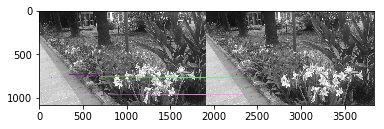

/content/drive/My Drive/cefcv/cv_photos/IMG_5455 (2019-4-18 15-43-14)/IMG_5455 04.jpg /content/drive/My Drive/cefcv/cv_photos/IMG_5455 (2019-4-18 15-43-14)/IMG_5455 05.jpg
 **** BRISK **** 


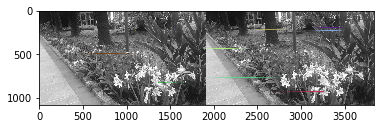

 **** SIFT **** 


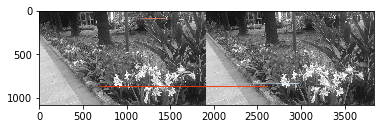

/content/drive/My Drive/cefcv/cv_photos/IMG_5435 (2019-4-18 12-14-01)/IMG_5435 01.jpg /content/drive/My Drive/cefcv/cv_photos/IMG_5435 (2019-4-18 12-14-01)/IMG_5435 02.jpg
 **** BRISK **** 


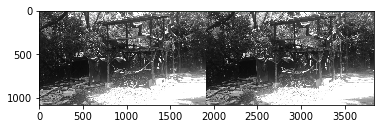

 **** SIFT **** 


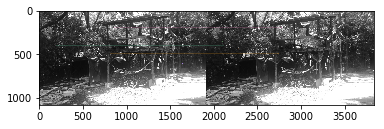

In [0]:
printmatch(photos,enh)

In [0]:
def printmatch(ph,enh):
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  for j,photos in enumerate(ph):  
    for i in range(len(photos)-1):
      matches_brisk = bf.match(des1_brisk[j][i],des2_brisk[j][i])
      matches_sift = bf.match(des1_sift[j][i],des2_sift[j][i])
      en_matches_brisk = bf.match(des1_brisk[j+4][i],des2_brisk[j+4][i])
      en_matches_sift = bf.match(des1_sift[j+4][i],des2_sift[j+4][i])
      img1 = cv2.imread(photos[i],0) 
      img2 = cv2.imread(photos[i+1],0)
      en_img1 = cv2.imread(enh[j][i],0) 
      en_img2 = cv2.imread(enh[j][i+1],0)
      matches_brisk = sorted(matches_brisk, key = lambda x:x.distance)
      matches_sift = sorted(matches_sift, key = lambda x:x.distance)
      en_matches_brisk = sorted(en_matches_brisk, key = lambda x:x.distance)
      en_matches_sift = sorted(en_matches_sift, key = lambda x:x.distance)
      ig1=img1.copy()
      ig1 = cv2.drawKeypoints(img1, keypoints[j][i], ig1, color=(0,255,0))
      ig2=en_img1.copy()
      ig2 = cv2.drawKeypoints(en_img1, keypoints[j+4][i], ig2, color=(0,255,0))
      ig3=img1.copy()
      ig3 = cv2.drawKeypoints(img1, keypoints_sift[j][i], ig3, color=(0,255,0))
      ig4=en_img2.copy()
      ig4 = cv2.drawKeypoints(en_img2, keypoints_sift[j+4][i], ig4, color=(0,255,0))
      img1 = img1[...,::-1]
      img2 = img2[...,::-1]
      en_img1 = img1[...,::-1]
      en_img2 = img2[...,::-1]
      cv2.imwrite(photos[i].split('.')[0]+'_key_sift.jpg',ig3)
      cv2.imwrite(photos[i].split('.')[0]+'_key_brisk.jpg',ig1)
      cv2.imwrite(photos[i].split('.')[0]+'_enhanced_key_sift.jpg',ig4)
      cv2.imwrite(photos[i].split('.')[0]+'_enhanced_key_brisk.jpg',ig2)
      print(photos[i],photos[i+1])
      print (' **** BRISK **** ')
      en_img3 = cv2.drawMatches(en_img1,kp1_brisk[j+4][i],en_img2,kp2_brisk[j+4][i],en_matches_brisk[:10],None, flags=2)    
      img3 = cv2.drawMatches(img1,kp1_brisk[j][i],img2,kp2_brisk[j][i],matches_brisk[:10],None, flags=2)
      plt.imshow(img3),plt.show()
      print (' **** SIFT **** ')
      en_img4 = cv2.drawMatches(en_img1,kp1_sift[j+4][i],en_img2,kp2_sift[j+4][i],en_matches_sift[:10],None, flags=2)
      img4 = cv2.drawMatches(img1,kp1_sift[j][i],img2,kp2_sift[j][i],matches_sift[:10],None, flags=2)
      plt.imshow(img4),plt.show()
      cv2.imwrite(photos[i].split('.')[0]+'_matches_sift.jpg',img4)
      cv2.imwrite(photos[i].split('.')[0]+'_matches_brisk.jpg',img3)
      cv2.imwrite(photos[i].split('.')[0]+'_enhanced_matches_sift.jpg',en_img4)
      cv2.imwrite(photos[i].split('.')[0]+'_enhanced_matches_brisk.jpg',en_img3)